Tensorflow seperates defining computations and actually executing them. Builds up a computation graph and then executes it. Do the calculations it takes to get to a certain cell, which means skips steps that are useless! Can be easily parallellized by calculating different parts of the graph different computers/cores. Can visualize the graph by using TensorBoard.

In [2]:
import numpy as np
import tensorflow as tf

In [1]:
## A tensor is basically a matrix. Scalar 0-dim, vector 1-dim, matrix 2-dim and so on

a = tf.add(3,5) ##adderar två tensorer och får en ny, 2 noder blir en ny nod
print(a) ## får alltid här en default graf som sessionen är kopplad till, kan koppla till andra grafer

sess = tf.Session() ##gör beräkningarna via en en session
x = sess.run(a)
print(x)

NameError: name 'tf' is not defined

In [12]:
x = tf.constant(2,name="x")
y = tf.constant(3,name="y")

op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
op3 = tf.pow(op1,op2)
useless = tf.add(op1,5) #don't need this to calculate op3

with tf.Session() as sess:
    print(sess.run(op3))
    a,b = sess.run([useless,op3])
    print(a)
    print(b)
print(x)
print((tf.Session()).run(x))

15625
10
15625
Tensor("x_7:0", shape=(), dtype=int32)
2


In [13]:
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], name='a') ##i tensorboard ser nu vad noden heter
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], name='b')
c = tf.multiply(a, b)

sess = tf.Session()
print(sess.run(c))
print(c)


[ 1.  4.  9. 16. 25. 36.]
Tensor("Mul_7:0", shape=(6,), dtype=float32)


In [17]:
g = tf.Graph() #skapar en graf som inte är default grafen
with g.as_default(): #sätter denna till våran aktuella graf!
    x = tf.add(3,5)
#sess = tf.Session() funkar ej!
sess = tf.Session(graph=g)
print(sess.run(x))

8


In [23]:
g1 = tf.get_default_graph()
g2 = tf.Graph()
# add ops to the default graph
with g1.as_default():
    a = tf.constant(3)
# add ops to the user created graph
with g2.as_default():
    b = tf.constant(5)
    c = tf.multiply(10,b)

x = tf.add(5,a)
sess = tf.Session()
print(sess.run(x))
sess = tf.Session(graph=g2)
print(sess.run(c))

8
50


In [3]:
a = tf.constant([2,2])
b = tf.constant([[1,1],[2,2]])
x = tf.multiply(a,b)
sess = tf.Session()
print(sess.run(x))

print(x)
print(a)


zeros = tf.zeros([5,6])
print(sess.run(zeros))

[[2 2]
 [4 4]]
Tensor("Mul:0", shape=(2, 2), dtype=int32)
Tensor("Const:0", shape=(2,), dtype=int32)
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [54]:
tf.reset_default_graph()
s = tf.Variable(2,name="scalar") ##en variable är ett objekt som innehåller en tensor. Kan ändra värde på den osv
m = tf.Variable([[2,2],[0,6]],name="matrix") ##dessa måste initialiseras. Om ej säger något så är trainable=True

s = tf.get_variable(initializer=2,name="scalar")
m = tf.get_variable(initializer = tf.constant([[2,2],[2,2]]),name="matrix")

##kan skapa problem eftersom lägger till två noder med samma namn i default grafen



In [59]:
W = tf.Variable(tf.random_normal([700, 10]))
with tf.Session() as sess:
    print(sess.run(W.initializer)) #notera när initialiserar den så får ingenting
    print(W.eval())
##efter använt en session så ska stänga den efter men med with så behövs det ej!


None
[[-1.8095102   0.6290951  -0.01524934 ... -1.1078047  -1.0136828
  -0.74618345]
 [-0.07681247 -0.84101135 -0.20427781 ... -0.2858144  -0.89496076
   1.3322527 ]
 [-1.451832    0.26954365 -1.3570725  ...  0.49193954 -0.6717794
   0.14656618]
 ...
 [ 1.1428466   0.5504437  -0.00874655 ...  0.6217006   1.3656809
   0.14347461]
 [-0.09506294  0.03651287  1.1618186  ... -0.9578532  -0.1709638
  -1.5856345 ]
 [-0.15315413 -0.16746192 -0.5821241  ... -0.08359166  0.59954834
  -1.3612636 ]]


In [68]:
tf.reset_default_graph()
W = tf.get_variable(initializer=10,name="W")
a = W.assign(100)
with tf.Session() as sess:
    sess.run(W.initializer)
    print(W.eval()) #prints 10
    sess.run(a)
    print(W.eval())
    

10
100


In [77]:
var = tf.Variable(2,name="my_var")

update = var.assign(2*var)
with tf.Session() as sess:
    sess.run(var.initializer)
    print(var.eval())
    sess.run(update)
    print(var.eval())
    sess.run(update)
    print(var.eval())

2
4
8


In [81]:
W = tf.Variable(10,name="my_var")

sess1 = tf.Session()
sess2 = tf.Session()


node1 = W.assign_add(10)
node2 = W.assign_add(5)

sess1.run(W.initializer)
sess2.run(W.initializer)


print(sess1.run(node1))
print(sess2.run(node2)) #har två olika sessioner för samma graf. De har sina egna kopior av variablerna!

sess1.close()
sess2.close()



20
15


In [88]:
## en placeholder är en tensor som inte behöver ges något värde i början. Vi kan säga vad den ska 
# ha för värde efteråt när vi kör grafen i en session

a = tf.placeholder(tf.float32,shape=[3])
b = tf.constant([5,5,5],tf.float32)

c = tf.add(a,b) #or a+b shortcut


with tf.Session() as sess:
    res = sess.run(c,feed_dict={a: [1,2,3]})
    print(res)

[6. 7. 8.]


In [89]:


a = tf.placeholder(tf.float32,shape=[3])
b = tf.constant([5,5,5],tf.float32)

c = tf.add(a,b) #or a+b shortcut

vals = [[1,2,3],[5,6,7],[6,7,5],[5,1,2]]
with tf.Session() as sess:
    for val in vals:
        res = sess.run(c,feed_dict={a: val})
        print(res)

[6. 7. 8.]
[10. 11. 12.]
[11. 12. 10.]
[10.  6.  7.]


In [90]:
mat = tf.constant([[1,1,1],[1,1,1]],name="matrix")
n1 = tf.reduce_sum(mat,axis=0) #reducerar längsmed raderna
n2 = tf.reduce_sum(mat,axis=1) #reducerar längsmed kolonnerna

with tf.Session() as sess:
    print(sess.run(n1))
    print(sess.run(n2))

[2 2 2]
[3 3]


In [99]:


W = tf.Variable(3,name="W",trainable=True,dtype=tf.float32)
b = tf.Variable(-3,name="b",trainable=True,dtype=tf.float32)
y = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32)

lin_model = W*x+b

loss = tf.reduce_sum(tf.square(y-lin_model))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss) #när kör denna noden så hittar gradienten och går i minus den
                                    ## för alla trainable variabler!
x_train = [0,1,2,3]
y_train = [-1,-2,-3,-4]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,100):
        sess.run(train,feed_dict={x:x_train,y:y_train})
    print(W.eval())
    print(b.eval())
        

-0.86613655
-1.285804


0.9357
[5]


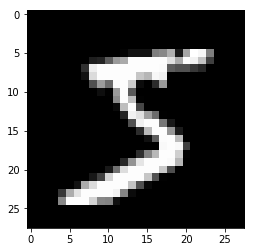

In [239]:
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_train2 = np.zeros((10,60000))
for ind,y in enumerate(y_train):
    y_train2[y,ind] = 1
y_train = y_train2

y_test2 = np.zeros((10,10000))
for ind,y in enumerate(y_test):
    y_test2[y,ind] = 1
y_test = y_test2


plt.imshow(x_train[0],cmap="gray")

#normalizing data has enormous impact
x_train2 = np.zeros((784,60000))
for i in range(0,60000):
    x = x_train[i]
    x = np.ravel(x)/255
    x_train2[:,i] = x
x_train = x_train2

x_test2 = np.zeros((784,10000))
for i in range(0,10000):
    x = x_test[i]
    x = np.ravel(x)/255
    x_test2[:,i] = x
x_test = x_test2


input = tf.placeholder(tf.float32,shape=[28*28,None])
output = tf.placeholder(tf.float32,shape=[10,None])

w1 = tf.Variable(tf.random_normal(shape=(500,28*28),stddev=0.1))
b1 = tf.Variable(tf.ones([500,1]))*0.1

w2 = tf.Variable(tf.random_normal(shape=(10,500),stddev=0.1))
b2 = tf.Variable(tf.ones([10,1]))*0.1

h1 = tf.nn.sigmoid(tf.matmul(w1,input)+b1)
h2 = tf.matmul(w2,h1)+b2
res = tf.nn.softmax(h2,axis=0) ##får en matrix

loss = tf.reduce_sum(tf.square(res-output)) #no axis så summerar över alla!
optimizer = tf.train.GradientDescentOptimizer(0.07)

train = optimizer.minimize(loss)

predict = tf.argmax(res,axis=0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,tf.argmax(output,axis=0)),tf.float32))

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(0,30000):
        if (i+1) % 9000 == 0:
            saver.save(sess,"mnist",global_step=i)
        x = np.random.randint(0,60000)
        sess.run(train,feed_dict={input:(x_train[:,x])[:,None],output:(y_train[:,x])[:,None]})
    print(sess.run(accuracy,feed_dict={input:x_test,output:y_test}))
    print(sess.run(predict,feed_dict={input:(x_test[:,23])[:,None]}))
    

    


In [4]:
##Keras sitter på tensorflow och underlätter användandet av NN. Finns två slags modeller:
# Sequential och Functional. Sequential lägger på layer efter layer. Enkel.
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1000/1000 [==============================] - 0s 340us/step - loss: 0.7053 - acc: 0.5340
Epoch 2/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.7031 - acc: 0.5330
Epoch 3/20
1000/1000 [==============================] - 0s 46us/step - loss: 0.7034 - acc: 0.5350
Epoch 4/20
1000/1000 [==============================] - 0s 22us/step - loss: 0.7138 - acc: 0.4960
Epoch 5/20
1000/1000 [==============================] - 0s 25us/step - loss: 0.6962 - acc: 0.5260
Epoch 6/20
1000/1000 [==============================] - 0s 26us/step - loss: 0.6949 - acc: 0.5470
Epoch 7/20
1000/1000 [==============================] - 0s 25us/step - loss: 0.7020 - acc: 0.4950
Epoch 8/20
1000/1000 [==============================] - 0s 19us/step - loss: 0.6955 - acc: 0.5070
Epoch 9/20
1000/1000 [==============================] - 0s 25us/step - loss: 0.6957 - acc: 0.5220
Epoch 10/20
1000/1000 [==============================] - 0s 36us/step

In [249]:
## Använder Functional model om flera input eller outputs (dvs vid olika ställen i NN) och
## shared layer, dvs använder ett layer flera ggr

from keras.layers import Input, Dense
from keras.models import Model

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_train2 = np.zeros((10,60000))
for ind,y in enumerate(y_train):
    y_train2[y,ind] = 1
y_train = y_train2

y_test2 = np.zeros((10,10000))
for ind,y in enumerate(y_test):
    y_test2[y,ind] = 1
y_test = y_test2

#normalizing data has enormous impact
x_train2 = np.zeros((784,60000))
for i in range(0,60000):
    x = x_train[i]
    x = np.ravel(x)/255
    x_train2[:,i] = x
x_train = x_train2

x_test2 = np.zeros((784,10000))
for i in range(0,10000):
    x = x_test[i]
    x = np.ravel(x)/255
    x_test2[:,i] = x
x_test = x_test2

##i detta fall vill tydligen ha datan längsmed kolonnerna
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

input = Input(shape=(784,)) 

x = Dense(64,activation="relu")(input)
x = Dense(64,activation="relu")(x)
output = Dense(10,activation="softmax")(x)

model = Model(inputs=input,outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']) ## när kompilerar så väljer vi loss och optimizer.
model.fit(x_train,y_train) #här sker träningen! Kan välja batch size och ##epochs

acc = model.evaluate(x_test,y_test)
print(acc)




Epoch 1/1
10000/10000 [==============================] - 1s 102us/step
[0.028389572135731577, 0.990220001411438]


In [256]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers.merge import concatenate

#shared layers!

input = Input(shape=(784,))
layer11 = Dense(64,activation="relu")(input)
layer12 = Dense(64,activation="relu")(layer11)

layer21 = Dense(64,activation="relu")(input)
layer = concatenate([layer12,layer21])

final = Dense(1,activation="sigmoid")(layer)

In [263]:
from keras.layers import Input, Dense, Add
from keras.models import Model
from keras.layers.merge import concatenate

input1 = Input(shape=(784,))
l1 = Dense(64,activation="relu")(input1)

input2 = Input(shape=(64,))
layer = Add()([input2,l1])
output = Dense(10,activation="softmax")(layer)

model = Model(inputs=[input1,input2],outputs=output)

In [ ]:
def locvol(t,S):
    return tf.sin(S)**2+t

def stochasticvol(t):
    return 1

def map_operation1(row,spotp,strikep,dt):
    endPrice = tf.scan(lambda a, x: a+stochasticvol(tf.cast(x[0],tf.float32)*dt)*locvol(tf.cast(x[0],tf.float32)*dt,a)*x[1],
                   (tf.range(50),row),initializer=spotp)
    return tf.maximum((endPrice-strikep),0.0)
    
def map_operation2(option):
    strikep = option[0]
    expiration = option[1]
    spotp = option[2]
    dt = expiration/tf.cast(N,tf.float32)
    
    mat = tf.random_normal(shape = (iterations,N), mean=0.0, stddev=tf.sqrt(dt), dtype=tf.float32)
    map_result = tf.map_fn(lambda row : map_operation1(row,spotp,strikep,dt), mat, dtype=tf.float32)
    return tf.reduce_mean(map_result)
        
        
options = tf.constant([[0.9,0.5,1.0],[0.9,1.0,1.0],[1.0,0.5,1.0],
                            [1.0,1.0,1.0],[1.1,0.5,1.0],[1.1,1.0,1.0],[1.0,0.75,1.0],[0.9,0.25,1.0]])
N = tf.constant(50,dtype=tf.int32) #time discretization
iterations = tf.constant(10**5)
option_prices = tf.map_fn(map_operation2,options,dtype=tf.float32)

with tf.Session() as sess:
    output = sess.run(option_prices)
    print(output)
        
        